In [184]:
from qiskit_nature.units import *   #ANGSTROM
from qiskit_nature.second_q.drivers import *    #PySCFDriver
from qiskit_nature.second_q.mappers import * #JordanWignerMapper
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
from qiskit_nature.second_q.problems import ElectronicStructureProblem
from qiskit_nature.second_q.problems import EigenstateResult
from qiskit_nature.second_q.circuit.library import *  #Ansatz, HF
#from qiskit_ibm_runtime import QiskitRuntimeService, Session, Estimator, Options
from qiskit_algorithms.optimizers import * 
from qiskit_algorithms import VQE
from braket.tracking import Tracker
from qiskit_braket_provider import *
from qiskit_aer import StatevectorSimulator
from qiskit.primitives import Estimator
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer
from qiskit_algorithms import AdaptVQE

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
import pandas as pd

In [25]:
def co2_molecula(z,y):
    driver = PySCFDriver(atom=f"O 0 {y} -{z}; C 0 0 0; O 0 {y} {z}", basis="sto-6g")
    estrutura_inicial = driver.run() 

    espaco_target_minimal = ActiveSpaceTransformer(4,4) 
    estrutura_minimal = espaco_target_minimal.transform(estrutura_inicial)
    mapa_minimal = estrutura_minimal.get_tapered_mapper(BravyiKitaevMapper())

    ansatz = UCCSD(
    estrutura_minimal.num_spatial_orbitals,
    estrutura_minimal.num_particles,
    mapa_minimal,
    initial_state=HartreeFock(
        estrutura_minimal.num_spatial_orbitals,
        estrutura_minimal.num_particles,
        mapa_minimal))


    vqe_solver = VQE(Estimator(), ansatz, SLSQP())
    vqe_solver.initial_point = [0.0] * ansatz.num_parameters


    calculo = GroundStateEigensolver(mapa_minimal, vqe_solver)
    resultado = calculo.solve(estrutura_minimal)
    return resultado

In [16]:
r = np.arange(1.10,1.21,0.01)
theta = np.arange(np.pi/4, np.pi/2 + np.pi/40, np.pi/40 )

In [26]:
par = [[r,o] for r in r for o in theta]

#info = [z,y,resultado]
info = [[a[0]*np.sin(a[1]),a[0]*np.cos(a[1]), co2_molecula(a[0]*np.sin(a[1]), a[0]*np.cos(a[1]))] for a in par]        

In [43]:
energia = []

for i in range(len(info)):
    energia.append([par[i][0],par[i][1],info[i][2].total_energies[0]])

In [60]:
raio = [energia[i][0] for i in range(len(energia))]
ang = [energia[i][1] for i in range(len(energia))]
energ = [energia[i][2] for i in range(len(energia))]
z = [info[i][0] for i in range(len(info))]
y = [info[i][1] for i in range(len(info))]

data = {'raio': raio,
        'angulo': ang,
        'coord_z': z,
        'coord_y': y,
        'energia': energ}

df = pd.DataFrame(data)
df.to_csv('PES do CO2.csv', index=False)

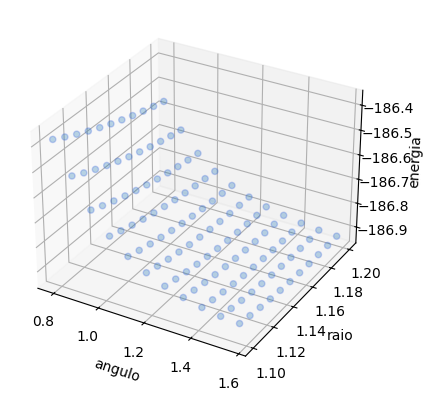

In [189]:
from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')
X=df.angulo
Y=df.raio
Z=df.energia


# Plot the 3D surface
ax.scatter(X, Y, Z, edgecolor='royalblue', alpha=0.3)

ax.set(xlabel='angulo', ylabel='raio', zlabel='energia')

plt.show()

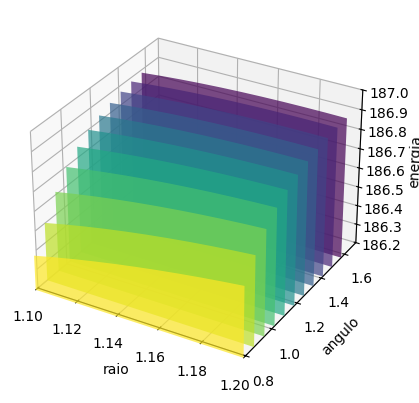

In [183]:
def polygon_under_graph(x, y):
    """
    Construct the vertex list which defines the polygon filling the space under
    the (x, y) line graph. This assumes x is in ascending order.
    """
    aux = [-i for i in y]
    return [(x[0], 186.2), *zip(x, aux), (x[-1], 186.2)]


ax = plt.figure().add_subplot(projection='3d')

angulos = df.angulo.unique()

# verts[i] is a list of (x, y) pairs defining polygon i.
verts = [polygon_under_graph(list(df[df.angulo == a]['raio']),list(df[df.angulo == a]['energia']))
         for a in angulos]
facecolors = plt.colormaps['viridis_r'](np.linspace(0, 1, len(verts)))

poly = PolyCollection(verts, facecolors=facecolors, alpha=.7)
ax.add_collection3d(poly, zs=angulos, zdir='y')

ax.set(xlim=(1.1, 1.2), ylim=(0.8, 1.7), zlim=(186.2,187),
       xlabel='raio', ylabel='angulo', zlabel='energia')

plt.show()

In [106]:
dist = df.raio.unique()

In [140]:
a = list(df[df.raio == dist[0]]['angulo'])
a

[0.7853981633974483,
 0.8639379797371931,
 0.9424777960769379,
 1.0210176124166828,
 1.0995574287564276,
 1.1780972450961724,
 1.2566370614359172,
 1.335176877775662,
 1.413716694115407,
 1.4922565104551517,
 1.5707963267948966]

In [113]:
varias = []

for i in range(len(dist)):
    aux = df[df.raio == dist[i]]
    aux = aux[['angulo', 'energia']]
    varias.append(aux)
    

In [123]:
varias[0].angulo

0     0.785398
1     0.863938
2     0.942478
3     1.021018
4     1.099557
5     1.178097
6     1.256637
7     1.335177
8     1.413717
9     1.492257
10    1.570796
Name: angulo, dtype: float64

In [127]:
ang = df.angulo.unique()

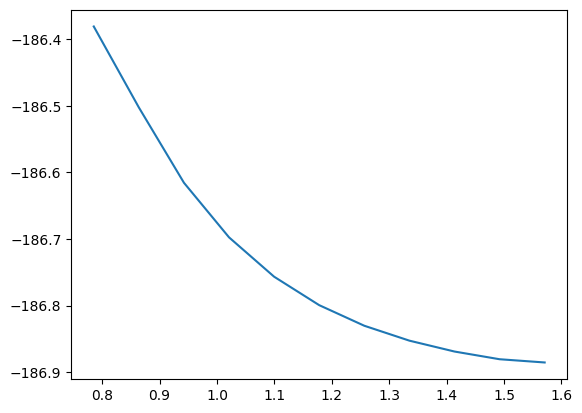

In [124]:
plt.plot(varias[0].angulo, varias[0].energia)

In [115]:
varias

[      angulo     energia
 0   0.785398 -186.380667
 1   0.863938 -186.502327
 2   0.942478 -186.615453
 3   1.021018 -186.697455
 4   1.099557 -186.756575
 5   1.178097 -186.799323
 6   1.256637 -186.830243
 7   1.335177 -186.852635
 8   1.413717 -186.868968
 9   1.492257 -186.880543
 10  1.570796 -186.885412,
       angulo     energia
 11  0.785398 -186.405662
 12  0.863938 -186.526109
 13  0.942478 -186.635351
 14  1.021018 -186.714356
 15  1.099557 -186.771240
 16  1.178097 -186.812335
 17  1.256637 -186.842055
 18  1.335177 -186.863599
 19  1.413717 -186.879358
 20  1.492257 -186.890566
 21  1.570796 -186.895287,
       angulo     energia
 22  0.785398 -186.429002
 23  0.863938 -186.547967
 24  0.942478 -186.653439
 25  1.021018 -186.729545
 26  1.099557 -186.784269
 27  1.178097 -186.823767
 28  1.256637 -186.852327
 29  1.335177 -186.873053
 30  1.413717 -186.888255
 31  1.492257 -186.899107
 32  1.570796 -186.903683,
       angulo     energia
 33  0.785398 -186.450763
 34  0.86